In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd

C:\Users\Tarique\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')

C:\Users\Tarique\AppData\Local\Temp\ipykernel_21196\1045290674.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=";", encoding='cp1252')


In [5]:
data.head(5)


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [7]:
data.nunique()

id               99408
category             7
title            58503
body             94503
amenities         9827
bathrooms           16
bedrooms            10
currency             1
fee                  2
has_photo            3
pets_allowed         4
price             3687
price_display     3718
price_type           3
square_feet       2538
address           7771
cityname          2979
state               51
latitude          7212
longitude         7270
source              25
time             75360
dtype: int64

In [36]:
data['bathrooms'].value_counts()

bathrooms
1.0    56303
2.0    36570
1.5     3175
2.5     2081
3.0      890
3.5      208
4.0      120
4.5       42
5.0       20
6.0        8
5.5        4
7.0        3
8.0        2
8.5        1
9.0        1
7.5        1
Name: count, dtype: int64

In [30]:
import statistics as stat

In [17]:
data.isnull().sum()

id                 0
category           0
title              0
body               0
bathrooms         63
bedrooms         124
currency           0
fee                0
has_photo          0
price              1
price_display      1
price_type         0
square_feet        0
cityname         302
state            302
latitude          25
longitude         25
source             0
time               0
dtype: int64

In [15]:
data.drop(columns = ['amenities','pets_allowed','address'],inplace=True)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
feature = ['price','square_feet']

In [44]:
known_data = data[data['bathrooms'].notnull()]
unknown_data = data[data['bathrooms'].isnull()]

In [45]:
model = RandomForestRegressor()
model.fit(known_data[feature], known_data['bathrooms'])

RandomForestRegressor()

In [46]:
predictions = model.predict(unknown_data[feature])
data.loc[data['bathrooms'].isnull(), 'bathrooms'] = predictions

In [51]:
data.isnull().sum()

id                 0
category           0
title              0
body               0
bathrooms          0
bedrooms           0
currency           0
fee                0
has_photo          0
price              1
price_display      1
price_type         0
square_feet        0
cityname         302
state            302
latitude          25
longitude         25
source             0
time               0
dtype: int64

In [48]:
known_data = data[data['bedrooms'].notnull()]
unknown_data = data[data['bedrooms'].isnull()]

In [49]:
model = RandomForestRegressor()
model.fit(known_data[feature], known_data['bedrooms'])

RandomForestRegressor()

In [50]:
predictions = model.predict(unknown_data[feature])
data.loc[data['bedrooms'].isnull(), 'bedrooms'] = predictions

In [52]:
data['cityname'].nunique()

2979

In [56]:
data['cityname'].value_counts().head(10)

cityname
Dallas         2858
Denver         2755
Los Angeles    2433
Las Vegas      1848
Arlington      1577
Atlanta        1506
Charlotte      1125
Alexandria      914
Richmond        914
San Antonio     873
Name: count, dtype: int64

In [61]:
from geopy.geocoders import Nominatim
import pandas as pd

geolocator = Nominatim(user_agent="geoapiExercises")

def get_location(lat, lon):
    if pd.notna(lat) and pd.notna(lon):
        location = geolocator.reverse((lat, lon), exactly_one=True)
        if location and location.raw.get('address'):
            address = location.raw['address']
            city = address.get('city', '')
            state = address.get('state', '')
            return city, state
    return None, None

data['cityname'], data['state'] = zip(*data.apply(
    lambda row: get_location(row['latitude'], row['longitude']) 
    if pd.isnull(row['cityname']) else (row['cityname'], row['state']), axis=1))


In [58]:
!pip install geopy


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 30.7/125.4 kB 1.3 MB/s eta 0:00:01
   ------------ -------------------------- 41.0/125.4 kB 279.3 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 817.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB 

In [65]:
data.isnull().sum()

id               0
category         0
title            0
body             0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99466 entries, 0 to 99491
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99466 non-null  object 
 1   bathrooms      99466 non-null  float64
 2   bedrooms       99466 non-null  float64
 3   currency       99466 non-null  object 
 4   fee            99466 non-null  object 
 5   has_photo      99466 non-null  object 
 6   price          99466 non-null  float64
 7   price_display  99466 non-null  object 
 8   price_type     99466 non-null  object 
 9   square_feet    99466 non-null  int64  
 10  cityname       99466 non-null  object 
 11  state          99466 non-null  object 
 12  latitude       99466 non-null  float64
 13  longitude      99466 non-null  float64
 14  source         99466 non-null  object 
 15  time           99466 non-null  int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 12.9+ MB


In [64]:
data.dropna(inplace=True)

In [71]:
data.nunique()

category             7
title            58481
body             94479
bathrooms           41
bedrooms           106
currency             1
fee                  2
has_photo            3
price             3687
price_display     3718
price_type           3
square_feet       2537
cityname          2981
state               58
latitude          7212
longitude         7270
source              25
time             75347
dtype: int64

In [86]:
data['source'].value_counts()

source
RentDigs.com         90900
RentLingo             6914
ListedBuy              568
GoSection8             437
RealRentals            268
tenantcloud            124
BostonApartments        94
RENTCafé                41
Listanza                29
SpreadMyAd              21
RENTOCULAR              18
RentFeeder              12
Claz                     8
Home Rentals             8
Nest Seekers             5
vFlyer                   5
rentbits                 5
Seattle Rentals          2
Real Estate Shows        1
Real Estate Agent        1
Apartable                1
Z57                      1
FreeAdsTime              1
AgentWebsite             1
HousesForRent            1
Name: count, dtype: int64

In [68]:
data.drop(columns='',inplace=True)

In [73]:
data.drop(columns='title',inplace=True)

In [75]:
data.drop(columns='body',inplace=True)

In [94]:
category_dummies = pd.get_dummies(data['category'],dtype=int,drop_first=True)

In [95]:
data = data.drop('category', axis=1).join(category_dummies)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99464 entries, 2 to 99491
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bathrooms                       99464 non-null  float64
 1   bedrooms                        99464 non-null  float64
 2   currency                        99464 non-null  int64  
 3   price                           99464 non-null  float64
 4   square_feet                     99464 non-null  int64  
 5   cityname                        99464 non-null  int32  
 6   state                           99464 non-null  int32  
 7   latitude                        99464 non-null  float64
 8   longitude                       99464 non-null  float64
 9   source                          99464 non-null  object 
 10  time                            99464 non-null  int64  
 11  housing/rent/apartment          99464 non-null  int32  
 12  housing/rent/commercial/retail  99464

In [97]:
data['currency'] = 1

In [100]:
fee_dum = pd.get_dummies(data['fee'],dtype=int,drop_first=True)

In [101]:
data = data.drop('fee', axis=1).join(fee_dum)

In [114]:
has_photo_dum = pd.get_dummies(data['has_photo'],dtype=int,drop_first=True)

In [121]:
    data = data.drop('has_photo',axis=1).join(has_photo_dum)

In [110]:
data['fee_yes'] = data['Yes']

In [116]:
data.drop(data['Yes'],inplace=True)

In [119]:
data.drop(columns='Yes',inplace=True)

In [124]:
data['price_display']

2        $1,395
3        $1,600
4          $975
5        $1,250
6        $1,600
          ...  
99487      $780
99488      $813
99489    $1,325
99490      $931
99491    $1,595
Name: price_display, Length: 99464, dtype: object

In [125]:
data['price_Display'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(int)


In [127]:
data.drop(columns='price_display',inplace=True)

In [129]:
data['price_type']

2        Monthly
3        Monthly
4        Monthly
5        Monthly
6        Monthly
          ...   
99487    Monthly
99488    Monthly
99489    Monthly
99490    Monthly
99491    Monthly
Name: price_type, Length: 99464, dtype: object

In [130]:
price_typr_dum = pd.get_dummies(data['price_type'],dtype=int,drop_first=True)

In [131]:
data = data.drop('price_type',axis=1).join(price_typr_dum)

In [134]:
data['cityname'].nunique()

2981

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
data['cityname'] = le.fit_transform(data['cityname'])

In [137]:
data['state'] = le.fit_transform(data['state'])

In [140]:
data['source'] = le.fit_transform(data['source'])

In [141]:
data.columns

Index(['bathrooms', 'bedrooms', 'currency', 'price', 'square_feet', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time',
       'housing/rent/apartment', 'housing/rent/commercial/retail',
       'housing/rent/condo', 'housing/rent/home', 'housing/rent/other',
       'housing/rent/short_term', 'fee_yes', 'Thumbnail', 'Yes',
       'price_Display', 'Monthly|Weekly', 'Weekly'],
      dtype='object')

In [142]:
X = data[['bathrooms', 'bedrooms', 'currency', 'square_feet', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time',
       'housing/rent/apartment', 'housing/rent/commercial/retail',
       'housing/rent/condo', 'housing/rent/home', 'housing/rent/other',
       'housing/rent/short_term', 'fee_yes', 'Thumbnail', 'Yes',
       'price_Display', 'Monthly|Weekly', 'Weekly']]
y = data['price']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [147]:
X_train_scaled = scaler.fit_transform(X_train)

In [148]:
X_test_scaled = scaler.fit(X_test)

In [151]:
'''param_grid = {
    'n_estimators': [100, 200, 300,],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}'''

In [150]:
#from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()

In [153]:
#grid_search = GridSearchCV(estimator=ran_for_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [156]:
#grid_search.fit(X_train_scaled, y_train)
ran_for_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [159]:
y_pred = ran_for_reg.predict(X_test)

C:\Users\Tarique\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [161]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2S',r2_score(y_test,y_pred))

MAE 39325.6620878016
MSE 1547382514.029907
R2S -2185.676097454423


In [259]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [162]:
import tensorflow

In [182]:
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation


In [201]:
model = Sequential()
model.add(Dense(256, activation='relu',kernel_regularizer = tensorflow.keras.regularizers.l2(0.5)))


model.add(Dense(128, activation='relu',kernel_regularizer = tensorflow.keras.regularizers.l2(0.5)))


model.add(Dense(64, activation='relu',kernel_regularizer = tensorflow.keras.regularizers.l2(0.5)))


model.add(Dense(32, activation='relu',kernel_regularizer = tensorflow.keras.regularizers.l2(0.5)))

model.add(Dense(1, activation='linear'))

In [202]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [211]:
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae', 'mse'])

In [232]:
early_stopping = EarlyStopping(monitor='mae',patience=10,restore_best_weights=True,min_delta=0.000001)

In [233]:
history = model.fit(
    X_train_scaled,y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping])

Epoch 1/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 51.2769 - mae: 0.6025 - mse: 22.4327 - val_loss: 38.7948 - val_mae: 0.4211 - val_mse: 9.9884
Epoch 2/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 49.1361 - mae: 0.7344 - mse: 20.3598 - val_loss: 34.7485 - val_mae: 0.1618 - val_mse: 5.9514
Epoch 3/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 31.8268 - mae: 0.1344 - mse: 3.0328 - val_loss: 37.9219 - val_mae: 0.0806 - val_mse: 9.1331
Epoch 4/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 32.4857 - mae: 0.2421 - mse: 3.7040 - val_loss: 29.5058 - val_mae: 0.2831 - val_mse: 0.7477
Epoch 5/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 41.1205 - mae: 0.4382 - mse: 12.3508 - val_loss: 59.8569 - val_mae: 1.9889 - val_mse: 31.0829
Epoch 6/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 55.6912 - mae: 1.0519 - mse: 26.9134 - val_loss: 35.0590 - val_mae: 0.0835 - val_mse: 6.3011
Epoch 7/1000
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - l

In [234]:
losses = pd.DataFrame(model.history.history)

<Axes: >

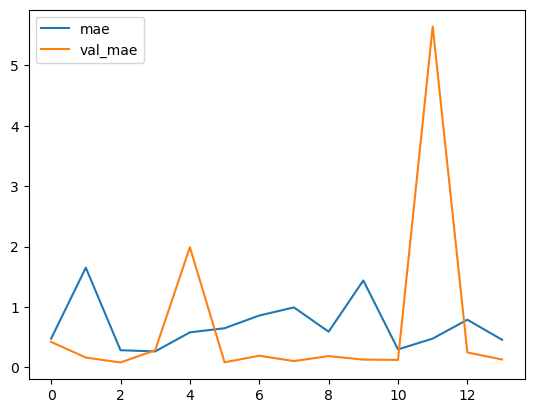

In [241]:
losses[['mae','val_mae']].plot()

In [245]:
pred1 = model.predict(X_test)

933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [246]:
print('MAE',mean_absolute_error(y_test,pred1))
print('MSE',mean_squared_error(y_test,pred1))
print('R2S',r2_score(y_test,pred1))

MAE 1277.4629120609395
MSE 2339544.702083728
R2S -2.3061162528257317


In [249]:
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU


In [265]:
model = Sequential()

input_dim=10

model.add(Dense(256, kernel_regularizer= tensorflow.keras.regularizers.l2(0.3), input_shape=(22,)))  
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))

model.add(Dense(128,kernel_regularizer = tensorflow.keras.regularizers.l2(0.3)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))


model.add(Dense(64,kernel_regularizer = tensorflow.keras.regularizers.l2(0.3)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))


model.add(Dense(64,kernel_regularizer = tensorflow.keras.regularizers.l2(0.3)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))


model.add(Dense(32,kernel_regularizer = tensorflow.keras.regularizers.l2(0.3)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))


model.add(Dense(1, activation='linear'))

C:\Users\Tarique\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Tarique\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [266]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [267]:
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 256)                 │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,313 (208.25 KB)

 Trainable params: 53,313 (208.25 KB)

 Non-trainable params: 0 (0.00 B)

In [268]:
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae', 'mse'])

In [269]:
early_stopping = EarlyStopping(
    monitor='val_mae',
    patience=10, 
    restore_best_weights=True, 
    min_delta=0.000001
)

In [263]:
num_features = 22
X_train = np.random.rand(1000, num_features)
y_train = np.random.rand(1000)

In [270]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 106.1107 - mae: 0.7353 - mse: 0.7666 - val_loss: 1686466592768.0000 - val_mae: 1298608.2500 - val_mse: 1686466592768.0000
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 55.4641 - mae: 0.3964 - mse: 0.2261 - val_loss: 27177110208512.0000 - val_mae: 5213037.0000 - val_mse: 27177110208512.0000
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 28.2701 - mae: 0.3421 - mse: 0.1713 - val_loss: 4546688974848.0000 - val_mae: 2132243.2500 - val_mse: 4546688974848.0000
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 14.4100 - mae: 0.3036 - mse: 0.1311 - val_loss: 299873337344.0000 - val_mae: 547592.0625 - val_mse: 299873337344.0000
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 7.4107 - mae: 0.2674 - mse: 0.1039 - val_loss: 12320991232.0000 - val_mae: 110993.1719 - val_mse: 12320991232.0000
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.8690 - mae: 0.2549 - mse: 0.0928 - val_

In [271]:
losses = pd.DataFrame(model.history.history)

<Axes: >

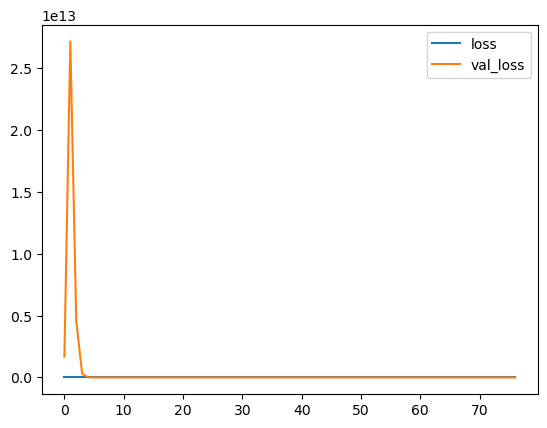

In [272]:
losses[['loss','val_loss']].plot()

<Axes: >

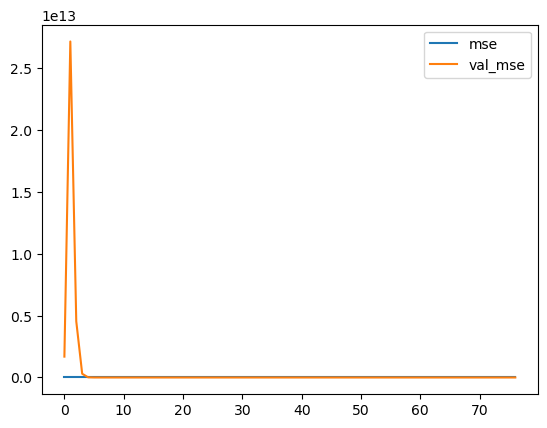

In [273]:
losses[['mse','val_mse']].plot()

<Axes: >

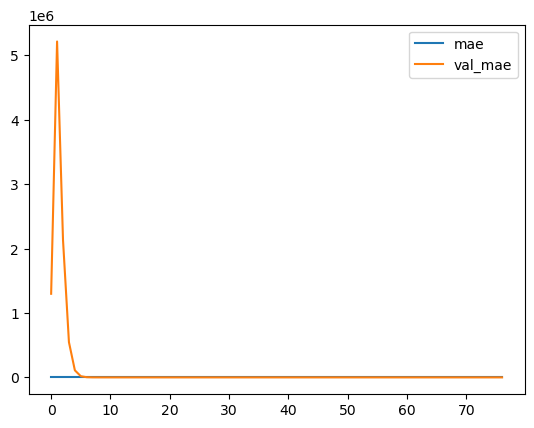

In [274]:
losses[['mae','val_mae']].plot()

In [275]:
pred2 = model.predict(X_test)

933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [276]:
print('MAE',mean_absolute_error(y_test,pred2))
print('MSE',mean_squared_error(y_test,pred2))
print('R2S',r2_score(y_test,pred2))

MAE 1524.7151088347384
MSE 3032397.5535422266
R2S -3.285217900673458
